In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
zf = ZipFile("../../Data/sim_sact_regimen.zip")
csv = zf.open("sim_sact_regimen.csv")
sim_sact_regimen = pd.read_csv(csv, encoding = 'latin1')
sim_sact_regimen.head()

,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID,BENCHMARK_GROUP
0,10000001,10000001,-1.0,NaN,N,2015-03-08,2015-03-08,DEGARELIX,NaN,N,10000235,HORMONES
1,10000002,10000002,NaN,NaN,P,2016-07-09,2016-07-10,BICALUTAMIDE + GOSERELIN,NaN,N,10000315,HORMONES
2,10000003,10000003,NaN,NaN,P,2014-01-09,2014-01-09,EXEMESTANE,02,N,10000337,HORMONES
3,10000004,10000004,NaN,NaN,NaN,2015-03-17,2015-03-23,Rituximab,N,NaN,10000480,RITUXIMAB
4,10000005,10000005,0.0,NaN,C,2012-12-30,2013-03-11,Hydroxycarbamide,N,N,10000533,HYDROXYCARBAMIDE


In [4]:
sim_sact_regimen.shape

(471919, 12)

In [5]:
sim_sact_regimen.isna().sum()

MERGED_REGIMEN_ID                  0
MERGED_TUMOUR_ID                   0
HEIGHT_AT_START_OF_REGIMEN    129514
WEIGHT_AT_START_OF_REGIMEN    129341
INTENT_OF_TREATMENT            62503
DATE_DECISION_TO_TREAT         60416
START_DATE_OF_REGIMEN              0
MAPPED_REGIMEN                  2371
CLINICAL_TRIAL                 61941
CHEMO_RADIATION               103648
MERGED_PATIENT_ID                  0
BENCHMARK_GROUP                    0
dtype: int64

In [6]:
sim_sact_regimen.dtypes

MERGED_REGIMEN_ID               int64
MERGED_TUMOUR_ID                int64
HEIGHT_AT_START_OF_REGIMEN    float64
WEIGHT_AT_START_OF_REGIMEN    float64
INTENT_OF_TREATMENT            object
DATE_DECISION_TO_TREAT         object
START_DATE_OF_REGIMEN          object
MAPPED_REGIMEN                 object
CLINICAL_TRIAL                 object
CHEMO_RADIATION                object
MERGED_PATIENT_ID               int64
BENCHMARK_GROUP                object
dtype: object

In [7]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') == 1].count()

MERGED_REGIMEN_ID             81706
MERGED_TUMOUR_ID              81706
HEIGHT_AT_START_OF_REGIMEN    57203
WEIGHT_AT_START_OF_REGIMEN    57241
INTENT_OF_TREATMENT           69561
DATE_DECISION_TO_TREAT        72104
START_DATE_OF_REGIMEN         81706
MAPPED_REGIMEN                81373
CLINICAL_TRIAL                71271
CHEMO_RADIATION               64349
MERGED_PATIENT_ID             81706
BENCHMARK_GROUP               81706
dtype: int64

In [8]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') > 1].count()

MERGED_REGIMEN_ID             390213
MERGED_TUMOUR_ID              390213
HEIGHT_AT_START_OF_REGIMEN    285202
WEIGHT_AT_START_OF_REGIMEN    285337
INTENT_OF_TREATMENT           339855
DATE_DECISION_TO_TREAT        339399
START_DATE_OF_REGIMEN         390213
MAPPED_REGIMEN                388175
CLINICAL_TRIAL                338707
CHEMO_RADIATION               303922
MERGED_PATIENT_ID             390213
BENCHMARK_GROUP               390213
dtype: int64

In [9]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') == 2].count()

MERGED_REGIMEN_ID             81834
MERGED_TUMOUR_ID              81834
HEIGHT_AT_START_OF_REGIMEN    58950
WEIGHT_AT_START_OF_REGIMEN    58919
INTENT_OF_TREATMENT           70648
DATE_DECISION_TO_TREAT        71402
START_DATE_OF_REGIMEN         81834
MAPPED_REGIMEN                81510
CLINICAL_TRIAL                71465
CHEMO_RADIATION               64378
MERGED_PATIENT_ID             81834
BENCHMARK_GROUP               81834
dtype: int64

In [10]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') == 3].count()

MERGED_REGIMEN_ID             77028
MERGED_TUMOUR_ID              77028
HEIGHT_AT_START_OF_REGIMEN    56218
WEIGHT_AT_START_OF_REGIMEN    56153
INTENT_OF_TREATMENT           66955
DATE_DECISION_TO_TREAT        66928
START_DATE_OF_REGIMEN         77028
MAPPED_REGIMEN                76675
CLINICAL_TRIAL                67048
CHEMO_RADIATION               60465
MERGED_PATIENT_ID             77028
BENCHMARK_GROUP               77028
dtype: int64

In [11]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') == 4].count()

MERGED_REGIMEN_ID             65612
MERGED_TUMOUR_ID              65612
HEIGHT_AT_START_OF_REGIMEN    48024
WEIGHT_AT_START_OF_REGIMEN    48002
INTENT_OF_TREATMENT           57271
DATE_DECISION_TO_TREAT        57105
START_DATE_OF_REGIMEN         65612
MAPPED_REGIMEN                65260
CLINICAL_TRIAL                57225
CHEMO_RADIATION               51042
MERGED_PATIENT_ID             65612
BENCHMARK_GROUP               65612
dtype: int64

In [12]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') == 5].count()

MERGED_REGIMEN_ID             51585
MERGED_TUMOUR_ID              51585
HEIGHT_AT_START_OF_REGIMEN    38051
WEIGHT_AT_START_OF_REGIMEN    37939
INTENT_OF_TREATMENT           45097
DATE_DECISION_TO_TREAT        44793
START_DATE_OF_REGIMEN         51585
MAPPED_REGIMEN                51329
CLINICAL_TRIAL                44845
CHEMO_RADIATION               40318
MERGED_PATIENT_ID             51585
BENCHMARK_GROUP               51585
dtype: int64

In [13]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') == 6].count()

MERGED_REGIMEN_ID             37116
MERGED_TUMOUR_ID              37116
HEIGHT_AT_START_OF_REGIMEN    27372
WEIGHT_AT_START_OF_REGIMEN    27437
INTENT_OF_TREATMENT           32450
DATE_DECISION_TO_TREAT        32245
START_DATE_OF_REGIMEN         37116
MAPPED_REGIMEN                36890
CLINICAL_TRIAL                32060
CHEMO_RADIATION               28701
MERGED_PATIENT_ID             37116
BENCHMARK_GROUP               37116
dtype: int64

In [14]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') > 6].count()

MERGED_REGIMEN_ID             77038
MERGED_TUMOUR_ID              77038
HEIGHT_AT_START_OF_REGIMEN    56587
WEIGHT_AT_START_OF_REGIMEN    56887
INTENT_OF_TREATMENT           67434
DATE_DECISION_TO_TREAT        66926
START_DATE_OF_REGIMEN         77038
MAPPED_REGIMEN                76511
CLINICAL_TRIAL                66064
CHEMO_RADIATION               59018
MERGED_PATIENT_ID             77038
BENCHMARK_GROUP               77038
dtype: int64

In [15]:
sim_sact_regimen[sim_sact_regimen.groupby('MERGED_PATIENT_ID')['MERGED_PATIENT_ID'].transform('size') > 25].count()

MERGED_REGIMEN_ID             28
MERGED_TUMOUR_ID              28
HEIGHT_AT_START_OF_REGIMEN    16
WEIGHT_AT_START_OF_REGIMEN    22
INTENT_OF_TREATMENT           25
DATE_DECISION_TO_TREAT        27
START_DATE_OF_REGIMEN         28
MAPPED_REGIMEN                28
CLINICAL_TRIAL                23
CHEMO_RADIATION               22
MERGED_PATIENT_ID             28
BENCHMARK_GROUP               28
dtype: int64

In [16]:
print("The original dataset has data for %d patients" % len(sim_sact_regimen))
print("After removing duplicates, the dataset has data for %d patients" % len(sim_sact_regimen.drop_duplicates()))
print("There are no duplicates in the dataset")

The original dataset has data for 471919 patients
After removing duplicates, the dataset has data for 471919 patients
There are no duplicates in the dataset


In [17]:
sim_sact_regimen.columns

Index(['MERGED_REGIMEN_ID', 'MERGED_TUMOUR_ID', 'HEIGHT_AT_START_OF_REGIMEN',
       'WEIGHT_AT_START_OF_REGIMEN', 'INTENT_OF_TREATMENT',
       'DATE_DECISION_TO_TREAT', 'START_DATE_OF_REGIMEN', 'MAPPED_REGIMEN',
       'CLINICAL_TRIAL', 'CHEMO_RADIATION', 'MERGED_PATIENT_ID',
       'BENCHMARK_GROUP'],
      dtype='object')

In [18]:
columns_selected = ['MERGED_REGIMEN_ID', 'MERGED_TUMOUR_ID', 'HEIGHT_AT_START_OF_REGIMEN',
       'WEIGHT_AT_START_OF_REGIMEN', 'INTENT_OF_TREATMENT',
       'CLINICAL_TRIAL', 'CHEMO_RADIATION', 'MERGED_PATIENT_ID',
       'BENCHMARK_GROUP']

In [19]:
sim_sact_regimen = sim_sact_regimen[columns_selected]
sim_sact_regimen.head()

,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID,BENCHMARK_GROUP
0,10000001,10000001,-1.0,NaN,N,NaN,N,10000235,HORMONES
1,10000002,10000002,NaN,NaN,P,NaN,N,10000315,HORMONES
2,10000003,10000003,NaN,NaN,P,02,N,10000337,HORMONES
3,10000004,10000004,NaN,NaN,NaN,N,NaN,10000480,RITUXIMAB
4,10000005,10000005,0.0,NaN,C,N,N,10000533,HYDROXYCARBAMIDE


In [20]:
df = pd.read_csv("./Data/avpat_avtum_sactpat_sacttum.csv", sep = "^", index_col = 0)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID,LINK_NUMBER,MERGED_TUMOUR_ID
0,10000724,M,810000724,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,NaN,NaN,NaN
1,10000752,F,810000752,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,NaN,NaN,NaN
2,10001050,F,810001050,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,NaN,NaN,NaN
3,10001750,M,810001750,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,NaN,NaN,NaN
4,10001824,F,810001824,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,NaN,NaN,NaN


In [21]:
df.shape

(124739, 77)

In [22]:
df = df.merge(sim_sact_regimen, left_on = 'MERGED_TUMOUR_ID', right_on = 'MERGED_TUMOUR_ID', how = 'left')
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP
0,10000724,M,810000724,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10000752,F,810000752,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001050,F,810001050,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001750,M,810001750,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001824,F,810001824,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(162536, 85)

In [24]:
df['HEIGHT_AT_START_OF_REGIMEN'].describe()

count    61879.000000
mean         1.568381
std          0.321759
min         -1.000000
25%          1.580000
50%          1.620000
75%          1.670000
max          2.100000
Name: HEIGHT_AT_START_OF_REGIMEN, dtype: float64

/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/elsa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


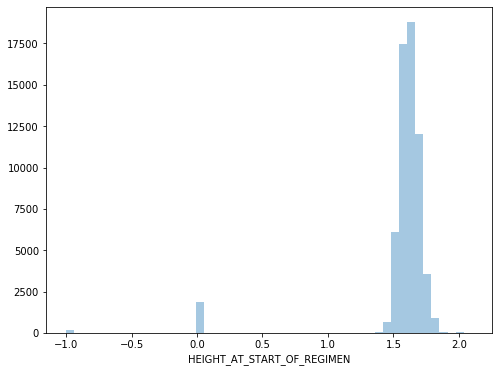

In [25]:
ax = sns.distplot(df['HEIGHT_AT_START_OF_REGIMEN'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6);

In [26]:
df['HEIGHT_AT_START_OF_REGIMEN'].unique()

array([  nan,  1.67,  1.68,  1.6 ,  1.75,  0.  ,  1.8 ,  1.7 ,  1.65,
        1.76,  1.82,  1.63,  1.71,  1.78,  1.83,  1.72,  1.69,  1.54,
       -1.  ,  1.77,  1.62,  1.53,  1.74,  1.73,  1.58,  1.55,  1.59,
        1.57,  1.66,  1.85,  1.81,  1.56,  1.64,  1.61,  1.47,  1.51,
        2.  ,  1.87,  1.52,  1.86,  1.48,  0.62,  1.5 ,  1.79,  1.46,
        1.45,  1.49,  1.41,  0.85,  1.44,  1.84,  1.17,  1.42,  0.71,
        1.4 ,  0.6 ,  1.35,  1.43,  1.36,  1.3 ,  1.88,  0.1 ,  1.89,
        1.31,  1.23,  1.98,  1.2 ,  1.1 ,  0.8 ,  0.02,  0.94,  0.79,
        1.  ,  1.9 ,  0.59,  1.18,  0.88,  0.93,  1.91,  1.94,  0.54,
        0.63,  1.03,  1.37,  0.84,  1.06,  0.7 ,  1.39,  1.01,  1.16,
        0.74,  1.27,  1.38,  0.01,  0.57,  0.53,  1.33,  1.92,  1.04,
        1.15,  2.1 ,  0.52])

In [27]:
def height(value):
    if value < 0.5:
        return np.nan
    else:
        return value
df['HEIGHT_AT_START_OF_REGIMEN'] = df['HEIGHT_AT_START_OF_REGIMEN'].apply(height)    
df['HEIGHT_AT_START_OF_REGIMEN'].unique()

array([ nan, 1.67, 1.68, 1.6 , 1.75, 1.8 , 1.7 , 1.65, 1.76, 1.82, 1.63,
       1.71, 1.78, 1.83, 1.72, 1.69, 1.54, 1.77, 1.62, 1.53, 1.74, 1.73,
       1.58, 1.55, 1.59, 1.57, 1.66, 1.85, 1.81, 1.56, 1.64, 1.61, 1.47,
       1.51, 2.  , 1.87, 1.52, 1.86, 1.48, 0.62, 1.5 , 1.79, 1.46, 1.45,
       1.49, 1.41, 0.85, 1.44, 1.84, 1.17, 1.42, 0.71, 1.4 , 0.6 , 1.35,
       1.43, 1.36, 1.3 , 1.88, 1.89, 1.31, 1.23, 1.98, 1.2 , 1.1 , 0.8 ,
       0.94, 0.79, 1.  , 1.9 , 0.59, 1.18, 0.88, 0.93, 1.91, 1.94, 0.54,
       0.63, 1.03, 1.37, 0.84, 1.06, 0.7 , 1.39, 1.01, 1.16, 0.74, 1.27,
       1.38, 0.57, 0.53, 1.33, 1.92, 1.04, 1.15, 2.1 , 0.52])

In [28]:
df['HEIGHT_AT_START_OF_REGIMEN'].describe()

count    59816.000000
mean         1.625639
std          0.076637
min          0.520000
25%          1.580000
50%          1.620000
75%          1.670000
max          2.100000
Name: HEIGHT_AT_START_OF_REGIMEN, dtype: float64

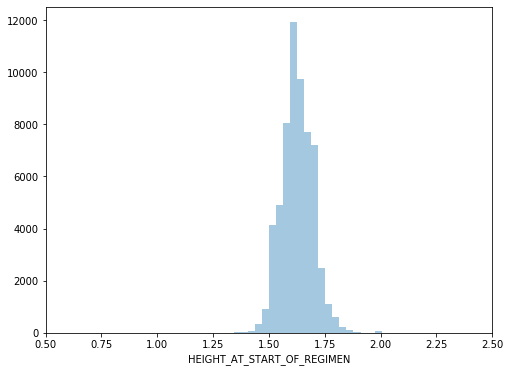

In [29]:
ax = sns.distplot(df['HEIGHT_AT_START_OF_REGIMEN'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6)
plt.xlim(0.5,2.5);

In [30]:
df['WEIGHT_AT_START_OF_REGIMEN'].describe()

count    61051.000000
mean        72.097255
std         20.474668
min         -1.000000
25%         61.700000
50%         71.000000
75%         82.400000
max        577.000000
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

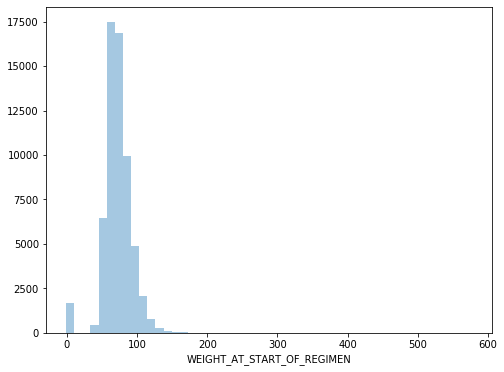

In [31]:
ax = sns.distplot(df['WEIGHT_AT_START_OF_REGIMEN'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6)

In [32]:
def weight(value):
    if value < 10 or value >= 350:
        return np.nan
    else:
        return value
df['WEIGHT_AT_START_OF_REGIMEN'] = df['WEIGHT_AT_START_OF_REGIMEN'].apply(weight)    
df['WEIGHT_AT_START_OF_REGIMEN'].sort_values(ascending = False).head(20)

102223    272.4
108943    272.4
99398     266.4
106182    266.4
114668    206.0
109221    191.4
108561    191.4
149360    179.6
131435    173.6
147401    173.0
11796     171.5
98249     169.0
48703     169.0
89439     169.0
117817    169.0
61483     169.0
9928      169.0
103134    169.0
48564     168.6
132402    167.4
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

In [33]:
df['WEIGHT_AT_START_OF_REGIMEN'].sort_values().head(20)

132251    10.00
130587    10.00
133183    10.00
133547    10.00
158477    11.80
159836    13.70
160386    16.50
158703    17.70
159901    17.80
158167    18.00
158948    18.60
159080    19.30
50189     20.00
159538    20.20
159375    21.90
160107    23.20
159633    23.60
158188    23.85
159599    24.40
158388    24.50
Name: WEIGHT_AT_START_OF_REGIMEN, dtype: float64

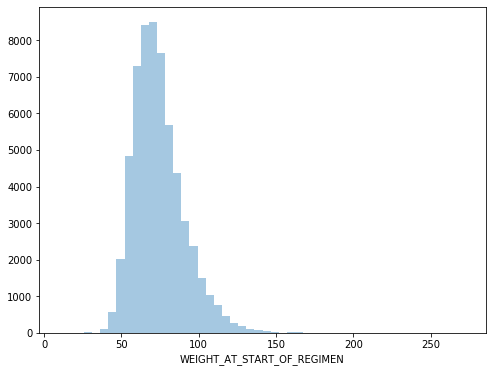

In [34]:
ax = sns.distplot(df['WEIGHT_AT_START_OF_REGIMEN'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6)

In [35]:
df['BMI'] = df.WEIGHT_AT_START_OF_REGIMEN / ((df.HEIGHT_AT_START_OF_REGIMEN) ** 2)
df[['WEIGHT_AT_START_OF_REGIMEN', 'HEIGHT_AT_START_OF_REGIMEN', 'BMI']].dropna().head(10)

,WEIGHT_AT_START_OF_REGIMEN,HEIGHT_AT_START_OF_REGIMEN,BMI
27,61.3,1.60,23.945312
42,80.0,1.75,26.122449
101,68.7,1.65,25.234160
102,81.8,1.76,26.407541
109,80.7,1.63,30.373744
124,73.6,1.78,23.229390
129,96.0,1.83,28.666129
151,93.7,1.72,31.672526
152,80.9,1.69,28.325339
167,111.0,1.72,37.520281


In [36]:
df['BMI'].describe()

count    47147.000000
mean        28.243166
std          7.628922
min          3.585643
25%         23.437500
50%         27.159109
75%         31.828090
max        289.281998
Name: BMI, dtype: float64

In [37]:
df['BMI'].sort_values(ascending=False).head(20)

27106     289.281998
157251    228.551086
61101     224.073542
97572     222.222222
77471     211.934156
61505     207.500000
157219    206.217298
160281    201.553254
10014     196.666667
102328    194.285714
5585      193.611111
101409    189.166667
61974     177.391554
72497     170.265349
78140     161.249685
160522    159.375000
5965      158.611111
5526      156.714938
44825     146.796271
16839     138.333333
Name: BMI, dtype: float64

In [38]:
df['BMI'].sort_values().head(20)

132251     3.585643
133547     3.763785
130587     3.906250
133183     3.906250
159836     4.135974
158477     4.787212
160386     5.092593
158948     5.152355
159080     6.448595
158167     6.611570
50189      6.920415
159921     7.435157
159375     7.947452
158388     8.092218
158452     9.142857
130614    10.976240
158839    10.976562
159538    11.419526
146236    12.187872
160186    12.357795
Name: BMI, dtype: float64

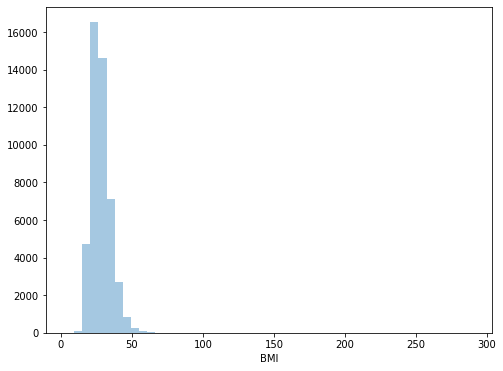

In [39]:
ax = sns.distplot(df['BMI'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6)

In [40]:
def bmi(value):
    if value < 10 or value > 100:
        return np.nan
    else:
        return value
df['BMI'] = df['BMI'].apply(bmi)    
df['BMI'].sort_values(ascending = False).head(20)

12077     99.385043
108943    94.256055
10888     91.251736
159059    90.700000
61826     82.700000
114668    80.468750
97776     79.289941
133138    74.400000
63779     74.000000
101020    73.696145
101928    72.979708
149360    72.862996
98860     72.325139
159813    72.086801
78327     71.637289
99666     71.404959
108561    69.458557
52316     69.421488
123571    69.219563
147401    67.578125
Name: BMI, dtype: float64

In [41]:
df['BMI'].sort_values().head(20)

130614    10.976240
158839    10.976562
159538    11.419526
146236    12.187872
160186    12.357795
158879    12.407407
131705    12.488522
136165    12.600000
162522    12.641285
147875    12.654321
159160    12.656250
159843    12.679628
64801     12.763540
161441    13.000000
143309    13.050000
146385    13.093878
110764    13.200000
159953    13.211785
52873     13.355102
132444    13.391003
Name: BMI, dtype: float64

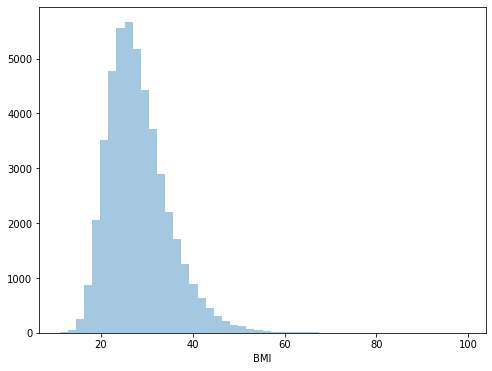

In [42]:
ax = sns.distplot(df['BMI'], hist = True, kde = False, bins = 50)
plt.gcf().set_size_inches(8,6)

In [43]:
df[['WEIGHT_AT_START_OF_REGIMEN', 'HEIGHT_AT_START_OF_REGIMEN', 'BMI']].dropna().sort_values(by = 'BMI').head(10)

,WEIGHT_AT_START_OF_REGIMEN,HEIGHT_AT_START_OF_REGIMEN,BMI
130614,34.00,1.76,10.976240
158839,28.10,1.60,10.976562
159538,20.20,1.33,11.419526
146236,36.90,1.74,12.187872
160186,30.85,1.58,12.357795
158879,40.20,1.80,12.407407
131705,34.00,1.65,12.488522
136165,50.40,2.00,12.600000
162522,34.00,1.64,12.641285
147875,41.00,1.80,12.654321


In [44]:
df[['WEIGHT_AT_START_OF_REGIMEN', 'HEIGHT_AT_START_OF_REGIMEN', 'BMI']].dropna().sort_values(by = 'BMI', ascending = False).head(10)

,WEIGHT_AT_START_OF_REGIMEN,HEIGHT_AT_START_OF_REGIMEN,BMI
12077,50.1,0.71,99.385043
108943,272.4,1.70,94.256055
10888,46.0,0.71,91.251736
159059,90.7,1.00,90.700000
61826,82.7,1.00,82.700000
114668,206.0,1.60,80.468750
97776,134.0,1.30,79.289941
133138,167.4,1.50,74.400000
63779,74.0,1.00,74.000000
101020,52.0,0.84,73.696145


In [45]:
df['BMI'].describe()

count    47104.000000
mean        28.166757
std          6.711363
min         10.976240
25%         23.437500
50%         27.153654
75%         31.816893
max         99.385043
Name: BMI, dtype: float64

In [46]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') == 2].sort_values(by=['PATIENTID','BMI']).head(10)

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,BMI
27,10010894,F,810010894,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,75.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,407.0,13.371938,1.114328,10010894.0,810010894.0,10002256.0,10004019.0,1.60,61.3,N,02,N,10010894.0,ECX,23.945312
26,10010894,F,810010894,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,75.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,407.0,13.371938,1.114328,10010894.0,810010894.0,10002256.0,10004018.0,NaN,NaN,NaN,N,NaN,10010894.0,CISPLATIN + RT,NaN
30,10011603,M,810011603,White British,A,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,75.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,1157.0,38.013101,3.167758,10011603.0,810011603.0,10002260.0,10004025.0,NaN,NaN,NaN,N,NaN,10011603.0,VEMURAFENIB,NaN
31,10011603,M,810011603,White British,A,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,75.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,1157.0,38.013101,3.167758,10011603.0,810011603.0,10002260.0,10004026.0,NaN,94.3,C,Y,N,10011603.0,CISPLATIN + RT,NaN
42,10019777,F,810019777,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,73.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,558.0,18.333025,1.527752,10019777.0,810019777.0,10006318.0,10010368.0,1.75,80.0,D,02,N,10019777.0,RITUXIMAB,26.122449
43,10019777,F,810019777,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,73.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,558.0,18.333025,1.527752,10019777.0,810019777.0,10010394.0,10008949.0,NaN,54.7,P,02,N,10019777.0,RITUXIMAB,NaN
58,10026526,M,810026

In [47]:
df[['PATIENTID','BMI']].sort_values(['PATIENTID', 'BMI'], ascending = [False, False]).head(50)

,PATIENTID,BMI
160434,220046077,NaN
160433,220039649,NaN
160432,220039640,17.076830
160431,220039621,NaN
160430,220036111,NaN
160429,220035286,NaN
160428,220032764,NaN
160427,220032699,NaN
160426,220032039,NaN
160424,220031977,NaN


In [48]:
df['BMI2'] = df.groupby('PATIENTID')['BMI'].transform(lambda x: x.median())

In [49]:
df[['PATIENTID','BMI','BMI2']].sort_values(by = 'PATIENTID', ascending = False).head(50)

,PATIENTID,BMI,BMI2
160434,220046077,NaN,NaN
160433,220039649,NaN,NaN
160432,220039640,17.076830,17.076830
160431,220039621,NaN,NaN
160430,220036111,NaN,NaN
160429,220035286,NaN,NaN
160428,220032764,NaN,NaN
160427,220032699,NaN,NaN
160426,220032039,NaN,NaN
160425,220031977,NaN,NaN


In [50]:
df['BMI2'].describe()

count    74544.000000
mean        27.849608
std          4.849431
min         10.976562
25%         24.622961
50%         27.325078
75%         30.385616
max         73.696145
Name: BMI2, dtype: float64

In [51]:
df['BMI3'] = df['BMI2'].fillna(df['BMI2'].median())

In [52]:
df[['PATIENTID','BMI','BMI2','BMI3']].sort_values(by = 'PATIENTID', ascending = False).head(50)

,PATIENTID,BMI,BMI2,BMI3
160434,220046077,NaN,NaN,27.325078
160433,220039649,NaN,NaN,27.325078
160432,220039640,17.076830,17.076830,17.076830
160431,220039621,NaN,NaN,27.325078
160430,220036111,NaN,NaN,27.325078
160429,220035286,NaN,NaN,27.325078
160428,220032764,NaN,NaN,27.325078
160427,220032699,NaN,NaN,27.325078
160426,220032039,NaN,NaN,27.325078
160425,220031977,NaN,NaN,27.325078


In [53]:
df = df.drop(['BMI','BMI2'], axis = 1)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,BMI3
0,10000724,M,810000724,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.325078
1,10000752,F,810000752,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.325078
2,10001050,F,810001050,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.325078
3,10001750,M,810001750,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.325078
4,10001824,F,810001824,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.325078


In [54]:
df['INTENT_OF_TREATMENT'].value_counts()

A    42308
P    11769
N    10864
9     5924
C     3333
D     1174
1      175
U      110
3       74
R       59
2       51
4       45
a       11
p       10
c        7
5        4
T        3
?        2
Name: INTENT_OF_TREATMENT, dtype: int64

In [55]:
# Source: https://www.datadictionary.nhs.uk/data_dictionary/attributes/c/cancer_treatment_intent_de.asp?shownav=1
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].astype(str)
def intent(value):
    if value == '1' or value == 'C' or value == 'c':
        return 'Curative'
    elif value == '2' or value == 'P' or value == 'p':
        return 'Palliative'
    elif value == '3':
        return 'Disease modification'
    elif value == '4' or value == 'D':
        return 'Diagnostic'
    elif value == '5':
        return 'Staging'
    elif value == '4' or value == 'D':
        return 'Diagnostic'
    elif value == 'A' or value == 'a':
        return 'Adjuvant'
    elif value == 'N':
        return 'Neoadjuvant'
    elif value == '9' or value == 'R' or value == 'U' or value == '?' or value == 'T' or value == 'nan':
        return np.nan
    else:
        return value
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].apply(intent)    
df['INTENT_OF_TREATMENT'].value_counts()

Adjuvant                42319
Palliative              11830
Neoadjuvant             10864
Curative                 3515
Diagnostic               1219
Disease modification       74
Staging                     4
Name: INTENT_OF_TREATMENT, dtype: int64

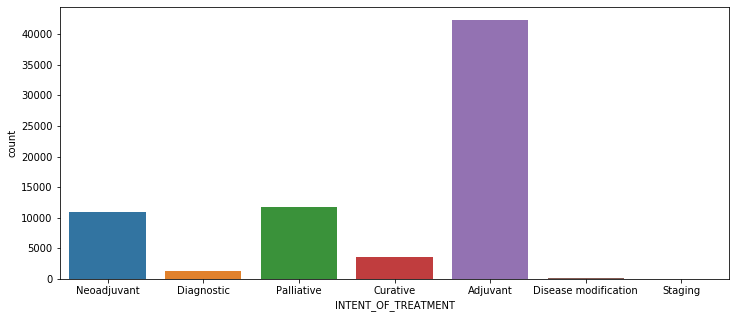

In [56]:
ax = sns.countplot(data = df, x = 'INTENT_OF_TREATMENT')
plt.gcf().set_size_inches(12,5)

In [57]:
df['INTENT_OF_TREATMENT'] = df['INTENT_OF_TREATMENT'].astype(str)
df['NEOADJUVANT'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Neoadjuvant' in tumour for tumour in patient) else False)
df['DIAGNOSTIC'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Diagnostic' in tumour for tumour in patient) else False)
df['PALLIATIVE'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Palliative' in tumour for tumour in patient) else False)
df['CURATIVE'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Curative' in tumour for tumour in patient) else False)
df['ADJUVANT'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Adjuvant' in tumour for tumour in patient) else False)
df['DISEASE_MOD'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Disease modification' in tumour for tumour in patient) else False)
df['STAGING'] = df.groupby('PATIENTID')['INTENT_OF_TREATMENT'].transform(lambda patient: True if any('Staging' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,ADJUVANT,DISEASE_MOD,STAGING
0,10000724,M,810000724,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,27.325078,False,False,False,False,False,False
1,10000752,F,810000752,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,27.325078,False,False,False,False,False,False
2,10001050,F,810001050,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,27.325078,False,False,False,False,False,False
3,10001750,M,810001750,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,27.325078,False,False,False,False,False,False
4,10001824,F,810001824,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,27.325078,False,False,False,False,False,False


In [58]:
df[df['PATIENTID'] == 20010794]

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,ADJUVANT,DISEASE_MOD,STAGING
14600,20010794,F,820010794,Other white background,A,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,62.0,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,965.666667,31.726866,2.643906,20010794.0,820010794.0,20027998.0,20052882.0,NaN,74.4,Adjuvant,2,N,20010794.0,TRASTUZUMAB,35.599858,False,False,True,True,False,False
14601,20010794,F,820010794,Other white background,A,3,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,62.0,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,965.666667,31.726866,2.643906,20010794.0,820010794.0,20101440.0,20097650.0,1.59,90.0,Palliative,1,N,20010794.0,TRIAL,35.599858,False,False,True,True,False,False


In [59]:
# df['DATE_DECISION_TO_TREAT'].sort_values().dropna().head(10)

In [60]:
# df['DATE_DECISION_TO_TREAT'].sort_values(ascending = False).dropna().head(10)

In [61]:
# df['START_DATE_OF_REGIMEN'].sort_values().dropna().head(10)

In [62]:
# df['START_DATE_OF_REGIMEN'].sort_values(ascending = False).dropna().head(10)

In [63]:
# df['DATE_DECISION_TO_TREAT'] = pd.to_datetime(df['DATE_DECISION_TO_TREAT'])
# df['START_DATE_OF_REGIMEN'] = pd.to_datetime(df['START_DATE_OF_REGIMEN'])
# df['DEC_TREAT'] = df['START_DATE_OF_REGIMEN'] - df['DATE_DECISION_TO_TREAT']
# df['DEC_TREAT_DAYS'] = df['DEC_TREAT'] / np.timedelta64(1, 'D')
# df[['DATE_DECISION_TO_TREAT', 'START_DATE_OF_REGIMEN', 'DEC_TREAT', 'DEC_TREAT_DAYS']].dropna().sort_values(by='DEC_TREAT_DAYS').head()

In [64]:
# def days(value):
#     if value < 0:
#         return np.nan
#     else:
#         return value
    
# df['DEC_TREAT_DAYS'] = df['DEC_TREAT_DAYS'].apply(days)
# df[['DATE_DECISION_TO_TREAT', 'START_DATE_OF_REGIMEN', 'DEC_TREAT', 'DEC_TREAT_DAYS']].dropna().sort_values(by='DEC_TREAT_DAYS', ascending=False).head()

In [65]:
# df['DEC_TREAT_DAYS'].value_counts()

In [66]:
df['CLINICAL_TRIAL'].value_counts()

N     46395
02    16979
2      8572
Y      1011
01      515
99      455
1       300
3        18
NO        3
0         2
n         2
Name: CLINICAL_TRIAL, dtype: int64

In [67]:
# Source: https://www.datadictionary.nhs.uk/data_dictionary/attributes/c/cla/clinical_trial_indicator_de.asp?shownav=1
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].astype(str)
def clinical_trial(value):
    if value == '1' or value == '01' or value == 'Y':
        return 'Y'
    elif value == '2' or value == '02' or value == 'N' or value == 'NO':
        return 'N'
    elif value == '99' or value == '3' or value == '0' or value == 'n' or value == 'nan':
        return np.nan
    else:
        return value
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].apply(clinical_trial)    
df['CLINICAL_TRIAL'].value_counts()

N    71949
Y     1826
Name: CLINICAL_TRIAL, dtype: int64

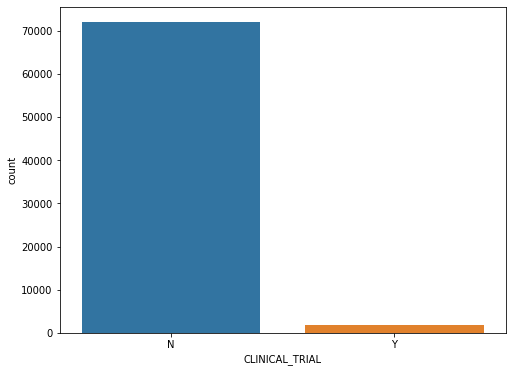

In [68]:
ax = sns.countplot(data = df, x = 'CLINICAL_TRIAL')
plt.gcf().set_size_inches(8,6)

In [69]:
df['CLINICAL_TRIAL'] = df['CLINICAL_TRIAL'].astype(str)
df['CT_YES'] = df.groupby('PATIENTID')['CLINICAL_TRIAL'].transform(lambda patient: True if any('Y' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES
0,10000724,M,810000724,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,27.325078,False,False,False,False,False,False,False
1,10000752,F,810000752,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,27.325078,False,False,False,False,False,False,False
2,10001050,F,810001050,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,27.325078,False,False,False,False,False,False,False
3,10001750,M,810001750,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,27.325078,False,False,False,False,False,False,False
4,10001824,F,810001824,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,27.325078,False,False,False,False,False,False,False


In [70]:
df['CHEMO_RADIATION'].value_counts()

N    65597
Y      361
2      294
n       54
y        1
Name: CHEMO_RADIATION, dtype: int64

In [71]:
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].astype(str)
def chemo(value):
    if value == 'Y' or value == 'y':
        return 'Y'
    elif value == 'N' or value == 'n':
        return 'N'
    elif value == '2' or value == 'nan':
        return np.nan
    else:
        return value
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].apply(chemo)    
df['CHEMO_RADIATION'].value_counts()

N    65651
Y      362
Name: CHEMO_RADIATION, dtype: int64

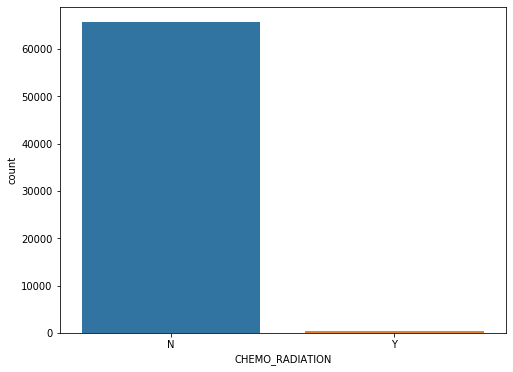

In [72]:
ax = sns.countplot(data = df, x = 'CHEMO_RADIATION')
plt.gcf().set_size_inches(8,6)

In [73]:
df['CHEMO_RADIATION'] = df['CHEMO_RADIATION'].astype(str)
df['CHEM_RAD_YES'] = df.groupby('PATIENTID')['CHEMO_RADIATION'].transform(lambda patient: True if any('Y' in tumour for tumour in patient) else False)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES
0,10000724,M,810000724,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False
1,10000752,F,810000752,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False
2,10001050,F,810001050,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False
3,10001750,M,810001750,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False
4,10001824,F,810001824,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False


In [74]:
df['BENCHMARK_GROUP'].value_counts()

FEC                                           17288
TRASTUZUMAB                                   11641
DOCETAXEL                                      9048
FEC + DOCETAXEL                                7892
HORMONES                                       6683
PACLITAXEL                                     4440
EC                                             4149
NOT CHEMO                                      2685
DENOSUMAB                                      2230
CYCLOPHOSPHAMIDE + DOCETAXEL                   1743
CAPECITABINE                                   1430
ZOLEDRONIC ACID                                1079
DOCETAXEL + TRASTUZUMAB                         938
TAC                                             888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN       803
EPIRUBICIN                                      790
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
GEMCARBO                                        608
DOCETAXEL + 

In [75]:
# chemotherapy = ['FEC','DOCETAXEL','FEC + DOCETAXEL','PACLITAXEL','EC','CYCLOPHOSPHAMIDE + DOCETAXEL','CAPECITABINE','TAC',
#                'CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN','EPIRUBICIN','GEMCARBO','ERIBULIN','AC','EC + DOCETAXEL','BEP',
#                'CARBOPLATIN','NAB-PACLITAXEL','VINORELBINE','CARBOPLATIN + PACLITAXEL','CARBOPLATIN + DOCETAXEL','CMF','MMM',
#                'CYCLOPHOSPHAMIDE','EPIRUBICIN + CMF','FLUOROURACIL','CISPLATIN + GEMCITABINE','EC + PACLITAXEL','EOF','VEPEMB',
#                'CAPECITABINE + OXALIPLATIN','CARBOPLATIN + ETOPOSIDE','OXALIPLATIN + MDG','CHOP','HYDROXYCARBAMIDE','CVP','ECF',
#                'METHOTREXATE HIGH DOSE','CAPECITABINE + VINORELBINE','CARBOPLATIN + PEMETREXED','METHOTREXATE INTRATHECAL',
#                'CISPLATIN + VINORELBINE','DOXORUBICIN','GEMCITABINE + PACLITAXEL','ECX','CARBOPLATIN + VINORELBINE','CVD','LEAM',
#                'IRINOTECAN + MDG','GEMCITABINE','CISPLATIN + PEMETREXED','CISPLATIN','CYTARABINE HD + METHOTREXATE HD','EOX',
#                'ETOPOSIDE','CTD','FEC + PACLITAXEL','TNT TRIAL','CISPLATIN + ETOPOSIDE','METHOTREXATE','VINCRISTINE','ABVD',
#                'FLUOROURACIL + IRINOTECAN + OXALIPLATIN','MITOXANTRONE + PACLITAXEL','CAPECITABINE + CISPLATIN','MITOMYCIN',
#                'CISPLATIN + FLUOROURACIL','CYCLOPHOSPHAMIDE + DOXORUBICIN','PEMETREXED','CHLORAMBUCIL','CYTARABINE HIGH DOSE',
#                'AZACITIDINE','CYCLOPHOSPHAMIDE + VINORELBINE','CAPECITABINE + CARBOPLATIN','CARBOPLATIN + LIPOSOMAL DOX','CCEP',
#                'UKALL2011','CAPECITABINE + DOCETAXEL','ESHAP','CODOX M','CYCLOPHOSPHAMIDE HIGH DOSE','CAPECITABINE + MITOMYCIN',
#                'VINBLASTINE','CYCLOPHOSPHAMIDE + FLUDARABINE','BUSULPHAN','BLEOMYCIN','VEDEX','BENDAMUSTINE','MELPHALAN','BEAM',
#                'CHLORAMBUCIL + ETOPOSIDE + LOMUSTINE','CYCLOPHOSPHAMIDE + PACLITAXEL','AML17','CISPLATIN + DOCETAXEL + FLUOROURACIL',
#                'PMITCEBO-R','TEMOZOLOMIDE','CARBO + FLUOROURACIL','CARBOPLATIN + DOXORUBICIN','OXALIPLATIN + RALTITREXED','MIC',
#                'CAPECITABINE + IRINOTECAN','EPIRUBICIN + CMF + DOCETAXEL','CAPECITABINE + CARBOPLATIN + EPIRUBICIN','RALTITREXED',
#                'DOCETAXEL + GEMCITABINE','DACARBAZINE','FLUDARABINE','EPIRUBICIN + FLUOROURACIL','LIPOSOMAL DOXORUBICIN','GDP',
#                'FLAG + IDARUBICIN','CODOX M + IVAC','DHAP','CAPECITABINE + EPIRUBICIN','MERCAPTOPURINE','MITOMYCIN INTRAVESICULAR',
#                'FLUOROURACIL + MITOMYCIN','CARBOPLATIN + IFOSFAMIDE','MTX HD + PROCARBAZINE + VINCRISTINE','CHLVPP','VIDE',
#                'CYTARABINE','CHOEP','CAPECITABINE + STREPTOZOCIN','CLADRIBINE','CYCLOPHOSPHAMIDE + MTX','PIXANTRONE','FLAG',
#                'CAPECITABINE + GEMCITABINE','TRABECTEDIN','CAPECITABINE + EPIRUBICIN + OXALIPLATIN','ARSENIC TRIOXIDE + ATRA',
#                'ECARBOX','IRINOTECAN + RALTITREXED','FAB LMB','CISPLATIN + DOX + ETOPOSIDE','MVAC','FOXTROT TRIAL','IVAC','PCV',
#                'CYCLOPHOSPHAMIDE + VINCRISTINE','CABAZITAXEL','TRIPLE INTRATHECAL','MITOXANTRONE','CYTARABINE INTRATHECAL',
#                'CARBOPLATIN + DOCETAXEL + FLUOROURACIL','OXALIPLATIN','IRINOTECAN','CYCLOPHOSPHAMIDE + ETOPOSIDE','PEI','IVE',
#                'CYTARABINE + METHOTREXATE','GEMCITABINE + VINORELBINE','GEDDIS TRIAL','FCARBOST','PENTOSTATIN','VIP','CVAD/MA',
#                'CISPLATIN + DOXORUBICIN','IDARAM','GEMCITABINE + OXALIPLATIN','DOXORUBICIN + IFOSFAMIDE','RMS 2005 TRIAL','CAP',
#                'CYCLOPHOSPHAMIDE + ETOPOSIDE + LOMUSTINE','PACLITAXEL + PEMETREXED','CAPECITABINE + CISPLATIN + EPIRUBICIN',
#                'MITOTANE','EEX','CISPLATIN + PACLITAXEL','CISPLATIN + LIPOSOMAL DOXORUBICIN','TEYSUNO','CVAD','IPO',
#                'AFLIBERCEPT + FU + IRINOTECAN','MVP','CAV']
# targeted = ['TRASTUZUMAB','DENOSUMAB','EVEROLIMUS','PERTUZUMAB + TRASTUZUMAB','TRASTUZUMAB EMTANSINE','PERSEPHONE TRIAL',
#            'BEVACIZUMAB','PERTUZUMAB','RITUXIMAB','KAITLIN TRIAL','BORTEZOMIB','IMATINIB','EPHOS-B TRIAL','PAZOPANIB',
#            'LENALIDOMIDE','KATHERINE TRIAL','VEMURAFENIB','IPILIMUMAB','STAKT TRIAL','ERLOTINIB','PEMBROLIZUMAB','SUNITINIB',
#            'RUXOLITINIB','SORAFENIB','CETUXIMAB','NILOTINIB','GALLIUM TRIAL','SAFEHER TRIAL','DABRAFENIB','IBRUTINIB',
#            'PHOENIX TRIAL','AFATINIB','MYELOMA XI TRIAL','ALEMTUZUMAB','BORTEZOMIB + THALIDOMIDE','OFATUMUMAB','VISMODEGIB',
#            'ARISTACAT TRIAL','NIVOLUMAB','DASATINIB','AXITINIB','BRENTUXIMAB','GEFITINIB','SORCE TRIAL','IDELALISIB + RITUXIMAB',
#            'LEGEND TRIAL','COMBI-AD TRIAL','ENCHANT TRIAL','THALIDOMIDE']
# chem_targ = ['DOCETAXEL + TRASTUZUMAB','FEC + DOCETAXEL + TRASTUZUMAB','TCH','DOCETAXEL + PERTUZUMAB + TRASTUZUMAB',
#             'PACLITAXEL + TRASTUZUMAB','FEC + TRASTUZUMAB','CYCLO + DOCETAXEL + TRASTUZUMAB','BENDAMUSTINE + RITUXIMAB',
#             'CHOP R','BEVACIZUMAB + PACLITAXEL','CARBO + DOCETAXEL + TRASTUZUMAB','CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB',
#             'CAPECITABINE + LAPATINIB','REMODL TRIAL','EC + DOCETAXEL + TRASTUZUMAB','CVP R','PACLITAXEL + BEVACIZUMAB',
#             'PAKT TRIAL','TAC + TRASTUZUMAB','RCEOP','BERENICE TRIAL','CAPECITABINE + TRASTUZUMAB','FCR','HCX','ICE-R',
#             'PACLITAXEL + PERTUZUMAB + TRASTUZUMAB','APHINITY TRIAL','CETUXIMAB + IRINOTECAN + MDG','DHAP - R','R CODOX',
#             'R CODOX-M/ R IVAC','CARBOPLATIN + TRASTUZUMAB','CYCLO + RITUXIMAB + VINCRISTINE','CVP R + GEMCITABINE','R-EPOCH',
#             'CYCLOPHOSPHAMIDE + LENALIDOMIDE','BEVACIZUMAB + CAPE + OXALIPLATIN','TRASTUZUMAB + VINORELBINE','R IVAC',
#             'CHOP-R + CYTARABINE HIGH DOSE','BEVACIZUMAB + CARBO + PACLITAXEL','BEVACIZUMAB + IRINOTECAN + MdG','MPV',
#             'BEVACIZUMAB + CARBO + GEMCITABINE','ESHAP R','CHOP R + METHOTREXATE','R-GEM-P','R CODOX M','RIALTO TRIAL',
#             'BEVACIZUMAB + CARBOPLATIN + PACLITAXEL','CETUXIMAB + OXALIPLATIN + MDG','CHLORAMBUCIL + RITUXIMAB','MPT',
#             'DOCETAXEL + NINTEDANIB','CYCLOPHOSPHAMIDE + RITUXIMAB','CYTARABINE + RITUXIMAB','BEVACIZUMAB + CAPE + IRINOTECAN',
#             'FLUDARABINE + RITUXIMAB','FLAIR TRIAL','CISPLATIN + GEMCITABINE + RITUXIMAB','CYCLOPHOSPHAMIDE + ETOPOSIDE + RITUXIMAB',
#             'R-CHOEP','OXALIPLATIN + MDG + PANITUMUMAB','BEVACIZUMAB + CAPECITABINE','PEGGY TRIAL','ARTEMIS TRIAL','UKALL 2011',
#             'ICON8B TRIAL','BEVACIZUMAB + OXALIPLATIN + MdG','CHOP R + BORTEZOMIB','GEMCITABINE + OXALIPLATIN + RITUXIMAB',
#             'CETUXIMAB + IRINOTECAN','CAPECITABINE + CETUXIMAB + CISPLATIN','R CODOX /IVAC','ETOPOSIDE + IFOSFAMIDE + RITUXIMAB',
#             'CAPE + CARBOPLATIN + CETUXIMAB','GEMCITABINE + RITUXIMAB','METHOTREXATE HIGH DOSE + RITUXIMAB','IVE-R',
#             'CAPECITABINE + CETUXIMAB + OXALIPATIN','ARCTIC TRIAL','RITUXIMAB + VINBLASTINE','BEVACIZUMAB + CARBO',
#             'EC + TRASTUZUMAB','BORTEZOMIB + DOXORUBICIN','IELSG32 TRIAL','CARBOPLATIN + CETUXIMAB + FU','CHLORAMBUCIL + OFATUMUMAB',
#             'BEVACIZUMAB + IRINOTECAN + MDG','DOCETAXEL + PERTUZUMAB','BEVACIZUMAB + FLUOROURACIL']
# chem_radio = ['CAPECITABINE + RT','CISPLATIN + RT','FLUOROURACIL + MITOMYCIN + RT','CARBOPLATIN + RT','STAMPEDE TRIAL',
#               'CISPLATIN + FLUOROURACIL + RT','CAPECITABINE + CISPLATIN + RT','GEMCITABINE + RT','PORTEC TRIAL','BR14 TRIAL',
#              'TEMOZOLOMIDE + RT','CARBOPLATIN + PACLITAXEL + RT','CISPLATIN + VINORELBINE + RT','ARISTOTLE TRIAL',
#              'CAPECITABINE + MITOMYCIN + RT']
# targ_radio = ['CETUXIMAB + RT']
# chem_radio_target = ['SCOPE 1 TRIAL','DE-ESCALATE TRIAL']
# horm_targ = ['MANTA TRIAL','PALLET TRIAL','OPPORTUNE TRIAL']
# hormone = ['HORMONES','NEOEXCEL TRIAL','ABIRATERONE','ENZALUTAMIDE','ABIRATERONE + EXEMESTANE','POETIC TRIAL','OCTREOTIDE',
#           'FALCON TRIAL','LANREOTIDE','MEDROXYPROGESTERONE']
# radio = ['RADIUM 223']
# other = ['ZOLEDRONIC ACID','PAMIDRONATE','BCG','DA','ATG','PEG INTERFERON','INTERFERON']
# nan = ['NOT CHEMO','TRIAL','NOT MATCHED','INCA TRIAL','UKALL2014','NHL 2003','MM','RATHL TRIAL','UKALL 2011','VE']

In [76]:
def chemo(value):
    if value in ['FEC','DOCETAXEL','FEC + DOCETAXEL','PACLITAXEL','EC','CYCLOPHOSPHAMIDE + DOCETAXEL','CAPECITABINE','TAC',
               'CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN','EPIRUBICIN','GEMCARBO','ERIBULIN','AC','EC + DOCETAXEL','BEP',
               'CARBOPLATIN','NAB-PACLITAXEL','VINORELBINE','CARBOPLATIN + PACLITAXEL','CARBOPLATIN + DOCETAXEL','CMF','MMM',
               'CYCLOPHOSPHAMIDE','EPIRUBICIN + CMF','FLUOROURACIL','CISPLATIN + GEMCITABINE','EC + PACLITAXEL','EOF','VEPEMB',
               'CAPECITABINE + OXALIPLATIN','CARBOPLATIN + ETOPOSIDE','OXALIPLATIN + MDG','CHOP','HYDROXYCARBAMIDE','CVP','ECF',
               'METHOTREXATE HIGH DOSE','CAPECITABINE + VINORELBINE','CARBOPLATIN + PEMETREXED','METHOTREXATE INTRATHECAL',
               'CISPLATIN + VINORELBINE','DOXORUBICIN','GEMCITABINE + PACLITAXEL','ECX','CARBOPLATIN + VINORELBINE','CVD','LEAM',
               'IRINOTECAN + MDG','GEMCITABINE','CISPLATIN + PEMETREXED','CISPLATIN','CYTARABINE HD + METHOTREXATE HD','EOX',
               'ETOPOSIDE','CTD','FEC + PACLITAXEL','TNT TRIAL','CISPLATIN + ETOPOSIDE','METHOTREXATE','VINCRISTINE','ABVD',
               'FLUOROURACIL + IRINOTECAN + OXALIPLATIN','MITOXANTRONE + PACLITAXEL','CAPECITABINE + CISPLATIN','MITOMYCIN',
               'CISPLATIN + FLUOROURACIL','CYCLOPHOSPHAMIDE + DOXORUBICIN','PEMETREXED','CHLORAMBUCIL','CYTARABINE HIGH DOSE',
               'AZACITIDINE','CYCLOPHOSPHAMIDE + VINORELBINE','CAPECITABINE + CARBOPLATIN','CARBOPLATIN + LIPOSOMAL DOX','CCEP',
               'UKALL2011','CAPECITABINE + DOCETAXEL','ESHAP','CODOX M','CYCLOPHOSPHAMIDE HIGH DOSE','CAPECITABINE + MITOMYCIN',
               'VINBLASTINE','CYCLOPHOSPHAMIDE + FLUDARABINE','BUSULPHAN','BLEOMYCIN','VEDEX','BENDAMUSTINE','MELPHALAN','BEAM',
               'CHLORAMBUCIL + ETOPOSIDE + LOMUSTINE','CYCLOPHOSPHAMIDE + PACLITAXEL','AML17','CISPLATIN + DOCETAXEL + FLUOROURACIL',
               'PMITCEBO-R','TEMOZOLOMIDE','CARBO + FLUOROURACIL','CARBOPLATIN + DOXORUBICIN','OXALIPLATIN + RALTITREXED','MIC',
               'CAPECITABINE + IRINOTECAN','EPIRUBICIN + CMF + DOCETAXEL','CAPECITABINE + CARBOPLATIN + EPIRUBICIN','RALTITREXED',
               'DOCETAXEL + GEMCITABINE','DACARBAZINE','FLUDARABINE','EPIRUBICIN + FLUOROURACIL','LIPOSOMAL DOXORUBICIN','GDP',
               'FLAG + IDARUBICIN','CODOX M + IVAC','DHAP','CAPECITABINE + EPIRUBICIN','MERCAPTOPURINE','MITOMYCIN INTRAVESICULAR',
               'FLUOROURACIL + MITOMYCIN','CARBOPLATIN + IFOSFAMIDE','MTX HD + PROCARBAZINE + VINCRISTINE','CHLVPP','VIDE',
               'CYTARABINE','CHOEP','CAPECITABINE + STREPTOZOCIN','CLADRIBINE','CYCLOPHOSPHAMIDE + MTX','PIXANTRONE','FLAG',
               'CAPECITABINE + GEMCITABINE','TRABECTEDIN','CAPECITABINE + EPIRUBICIN + OXALIPLATIN','ARSENIC TRIOXIDE + ATRA',
               'ECARBOX','IRINOTECAN + RALTITREXED','FAB LMB','CISPLATIN + DOX + ETOPOSIDE','MVAC','FOXTROT TRIAL','IVAC','PCV',
               'CYCLOPHOSPHAMIDE + VINCRISTINE','CABAZITAXEL','TRIPLE INTRATHECAL','MITOXANTRONE','CYTARABINE INTRATHECAL',
               'CARBOPLATIN + DOCETAXEL + FLUOROURACIL','OXALIPLATIN','IRINOTECAN','CYCLOPHOSPHAMIDE + ETOPOSIDE','PEI','IVE',
               'CYTARABINE + METHOTREXATE','GEMCITABINE + VINORELBINE','GEDDIS TRIAL','FCARBOST','PENTOSTATIN','VIP','CVAD/MA',
               'CISPLATIN + DOXORUBICIN','IDARAM','GEMCITABINE + OXALIPLATIN','DOXORUBICIN + IFOSFAMIDE','RMS 2005 TRIAL','CAP',
               'CYCLOPHOSPHAMIDE + ETOPOSIDE + LOMUSTINE','PACLITAXEL + PEMETREXED','CAPECITABINE + CISPLATIN + EPIRUBICIN',
               'MITOTANE','EEX','CISPLATIN + PACLITAXEL','CISPLATIN + LIPOSOMAL DOXORUBICIN','TEYSUNO','CVAD','IPO',
               'AFLIBERCEPT + FU + IRINOTECAN','MVP','CAV']:
        return 'Chemotherapy'
    else:
        return value

df['CHEMOTHERAPY'] = df['BENCHMARK_GROUP'].apply(chemo)  
df['CHEMOTHERAPY'].value_counts()

Chemotherapy                                  54231
TRASTUZUMAB                                   11641
HORMONES                                       6683
NOT CHEMO                                      2685
DENOSUMAB                                      2230
ZOLEDRONIC ACID                                1079
DOCETAXEL + TRASTUZUMAB                         938
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
DOCETAXEL + PERTUZUMAB + TRASTUZUMAB            553
TRIAL                                           349
NOT MATCHED                                     344
EVEROLIMUS                                      328
PACLITAXEL + TRASTUZUMAB                        293
PERTUZUMAB + TRASTUZUMAB                        283
TRASTUZUMAB EMTANSINE                           229
FEC + TRASTUZUMAB                               203
CYCLO + DOCETAXEL + TRASTUZUMAB                 181
BENDAMUSTINE + RITUXIMAB                        133
CHOP R      

In [77]:
def targeted(value):
    if value in ['TRASTUZUMAB','DENOSUMAB','EVEROLIMUS','PERTUZUMAB + TRASTUZUMAB','TRASTUZUMAB EMTANSINE','PERSEPHONE TRIAL',
           'BEVACIZUMAB','PERTUZUMAB','RITUXIMAB','KAITLIN TRIAL','BORTEZOMIB','IMATINIB','EPHOS-B TRIAL','PAZOPANIB',
           'LENALIDOMIDE','KATHERINE TRIAL','VEMURAFENIB','IPILIMUMAB','STAKT TRIAL','ERLOTINIB','PEMBROLIZUMAB','SUNITINIB',
           'RUXOLITINIB','SORAFENIB','CETUXIMAB','NILOTINIB','GALLIUM TRIAL','SAFEHER TRIAL','DABRAFENIB','IBRUTINIB',
           'PHOENIX TRIAL','AFATINIB','MYELOMA XI TRIAL','ALEMTUZUMAB','BORTEZOMIB + THALIDOMIDE','OFATUMUMAB','VISMODEGIB',
           'ARISTACAT TRIAL','NIVOLUMAB','DASATINIB','AXITINIB','BRENTUXIMAB','GEFITINIB','SORCE TRIAL','IDELALISIB + RITUXIMAB',
           'LEGEND TRIAL','COMBI-AD TRIAL','ENCHANT TRIAL','THALIDOMIDE']:
        return 'Targeted'
    else:
        return value

df['TARGETED'] = df['BENCHMARK_GROUP'].apply(targeted)
df['TARGETED'].value_counts()

FEC                                           17288
Targeted                                      15531
DOCETAXEL                                      9048
FEC + DOCETAXEL                                7892
HORMONES                                       6683
PACLITAXEL                                     4440
EC                                             4149
NOT CHEMO                                      2685
CYCLOPHOSPHAMIDE + DOCETAXEL                   1743
CAPECITABINE                                   1430
ZOLEDRONIC ACID                                1079
DOCETAXEL + TRASTUZUMAB                         938
TAC                                             888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN       803
EPIRUBICIN                                      790
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
GEMCARBO                                        608
DOCETAXEL + PERTUZUMAB + TRASTUZUMAB            553
ERIBULIN    

In [78]:
def chem_targ(value):
    if value in ['DOCETAXEL + TRASTUZUMAB','FEC + DOCETAXEL + TRASTUZUMAB','TCH','DOCETAXEL + PERTUZUMAB + TRASTUZUMAB',
            'PACLITAXEL + TRASTUZUMAB','FEC + TRASTUZUMAB','CYCLO + DOCETAXEL + TRASTUZUMAB','BENDAMUSTINE + RITUXIMAB',
            'CHOP R','BEVACIZUMAB + PACLITAXEL','CARBO + DOCETAXEL + TRASTUZUMAB','CYCLOPHOSPHAMIDE + DOCETAXEL + TRASTUZUMAB',
            'CAPECITABINE + LAPATINIB','REMODL TRIAL','EC + DOCETAXEL + TRASTUZUMAB','CVP R','PACLITAXEL + BEVACIZUMAB',
            'PAKT TRIAL','TAC + TRASTUZUMAB','RCEOP','BERENICE TRIAL','CAPECITABINE + TRASTUZUMAB','FCR','HCX','ICE-R',
            'PACLITAXEL + PERTUZUMAB + TRASTUZUMAB','APHINITY TRIAL','CETUXIMAB + IRINOTECAN + MDG','DHAP - R','R CODOX',
            'R CODOX-M/ R IVAC','CARBOPLATIN + TRASTUZUMAB','CYCLO + RITUXIMAB + VINCRISTINE','CVP R + GEMCITABINE','R-EPOCH',
            'CYCLOPHOSPHAMIDE + LENALIDOMIDE','BEVACIZUMAB + CAPE + OXALIPLATIN','TRASTUZUMAB + VINORELBINE','R IVAC',
            'CHOP-R + CYTARABINE HIGH DOSE','BEVACIZUMAB + CARBO + PACLITAXEL','BEVACIZUMAB + IRINOTECAN + MdG','MPV',
            'BEVACIZUMAB + CARBO + GEMCITABINE','ESHAP R','CHOP R + METHOTREXATE','R-GEM-P','R CODOX M','RIALTO TRIAL',
            'BEVACIZUMAB + CARBOPLATIN + PACLITAXEL','CETUXIMAB + OXALIPLATIN + MDG','CHLORAMBUCIL + RITUXIMAB','MPT',
            'DOCETAXEL + NINTEDANIB','CYCLOPHOSPHAMIDE + RITUXIMAB','CYTARABINE + RITUXIMAB','BEVACIZUMAB + CAPE + IRINOTECAN',
            'FLUDARABINE + RITUXIMAB','FLAIR TRIAL','CISPLATIN + GEMCITABINE + RITUXIMAB','CYCLOPHOSPHAMIDE + ETOPOSIDE + RITUXIMAB',
            'R-CHOEP','OXALIPLATIN + MDG + PANITUMUMAB','BEVACIZUMAB + CAPECITABINE','PEGGY TRIAL','ARTEMIS TRIAL','UKALL 2011',
            'ICON8B TRIAL','BEVACIZUMAB + OXALIPLATIN + MdG','CHOP R + BORTEZOMIB','GEMCITABINE + OXALIPLATIN + RITUXIMAB',
            'CETUXIMAB + IRINOTECAN','CAPECITABINE + CETUXIMAB + CISPLATIN','R CODOX /IVAC','ETOPOSIDE + IFOSFAMIDE + RITUXIMAB',
            'CAPE + CARBOPLATIN + CETUXIMAB','GEMCITABINE + RITUXIMAB','METHOTREXATE HIGH DOSE + RITUXIMAB','IVE-R',
            'CAPECITABINE + CETUXIMAB + OXALIPATIN','ARCTIC TRIAL','RITUXIMAB + VINBLASTINE','BEVACIZUMAB + CARBO',
            'EC + TRASTUZUMAB','BORTEZOMIB + DOXORUBICIN','IELSG32 TRIAL','CARBOPLATIN + CETUXIMAB + FU','CHLORAMBUCIL + OFATUMUMAB',
            'BEVACIZUMAB + IRINOTECAN + MDG','DOCETAXEL + PERTUZUMAB','BEVACIZUMAB + FLUOROURACIL']:
        return 'Chem_Targ'
    else:
        return value

df['CHEM_TARG'] = df['BENCHMARK_GROUP'].apply(chem_targ) 
df['CHEM_TARG'].value_counts()

FEC                                          17288
TRASTUZUMAB                                  11641
DOCETAXEL                                     9048
FEC + DOCETAXEL                               7892
HORMONES                                      6683
Chem_Targ                                     4581
PACLITAXEL                                    4440
EC                                            4149
NOT CHEMO                                     2685
DENOSUMAB                                     2230
CYCLOPHOSPHAMIDE + DOCETAXEL                  1743
CAPECITABINE                                  1430
ZOLEDRONIC ACID                               1079
TAC                                            888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN      803
EPIRUBICIN                                     790
GEMCARBO                                       608
ERIBULIN                                       422
AC                                             404
EC + DOCETAXEL                 

In [79]:
def chem_radio(value):
    if value in ['CAPECITABINE + RT','CISPLATIN + RT','FLUOROURACIL + MITOMYCIN + RT','CARBOPLATIN + RT','STAMPEDE TRIAL',
              'CISPLATIN + FLUOROURACIL + RT','CAPECITABINE + CISPLATIN + RT','GEMCITABINE + RT','PORTEC TRIAL','BR14 TRIAL',
             'TEMOZOLOMIDE + RT','CARBOPLATIN + PACLITAXEL + RT','CISPLATIN + VINORELBINE + RT','ARISTOTLE TRIAL',
             'CAPECITABINE + MITOMYCIN + RT']:
        return 'Chem_Radio'
    else:
        return value

df['CHEM_RADIO'] = df['BENCHMARK_GROUP'].apply(chem_radio) 
df['CHEM_RADIO'].value_counts()

FEC                                           17288
TRASTUZUMAB                                   11641
DOCETAXEL                                      9048
FEC + DOCETAXEL                                7892
HORMONES                                       6683
PACLITAXEL                                     4440
EC                                             4149
NOT CHEMO                                      2685
DENOSUMAB                                      2230
CYCLOPHOSPHAMIDE + DOCETAXEL                   1743
CAPECITABINE                                   1430
ZOLEDRONIC ACID                                1079
DOCETAXEL + TRASTUZUMAB                         938
TAC                                             888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN       803
EPIRUBICIN                                      790
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
GEMCARBO                                        608
DOCETAXEL + 

In [80]:
def targ_radio(value):
    if value in ['CETUXIMAB + RT']:
        return 'Targ_Radio'
    else:
        return value

df['TARG_RADIO'] = df['BENCHMARK_GROUP'].apply(targ_radio) 
df['TARG_RADIO'].value_counts()

FEC                                           17288
TRASTUZUMAB                                   11641
DOCETAXEL                                      9048
FEC + DOCETAXEL                                7892
HORMONES                                       6683
PACLITAXEL                                     4440
EC                                             4149
NOT CHEMO                                      2685
DENOSUMAB                                      2230
CYCLOPHOSPHAMIDE + DOCETAXEL                   1743
CAPECITABINE                                   1430
ZOLEDRONIC ACID                                1079
DOCETAXEL + TRASTUZUMAB                         938
TAC                                             888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN       803
EPIRUBICIN                                      790
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
GEMCARBO                                        608
DOCETAXEL + 

In [81]:
def chem_radio_target(value):
    if value in ['SCOPE 1 TRIAL','DE-ESCALATE TRIAL']:
        return 'Chem_Radio_Target'
    else:
        return value

df['CHEM_RADIO_TARG'] = df['BENCHMARK_GROUP'].apply(chem_radio_target) 
df['CHEM_RADIO_TARG'].value_counts()

FEC                                           17288
TRASTUZUMAB                                   11641
DOCETAXEL                                      9048
FEC + DOCETAXEL                                7892
HORMONES                                       6683
PACLITAXEL                                     4440
EC                                             4149
NOT CHEMO                                      2685
DENOSUMAB                                      2230
CYCLOPHOSPHAMIDE + DOCETAXEL                   1743
CAPECITABINE                                   1430
ZOLEDRONIC ACID                                1079
DOCETAXEL + TRASTUZUMAB                         938
TAC                                             888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN       803
EPIRUBICIN                                      790
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
GEMCARBO                                        608
DOCETAXEL + 

In [82]:
def horm_targ(value):
    if value in ['MANTA TRIAL','PALLET TRIAL','OPPORTUNE TRIAL']:
        return 'Horm_Targ'
    else:
        return value

df['HORM_TARG'] = df['BENCHMARK_GROUP'].apply(horm_targ) 
df['HORM_TARG'].value_counts()

FEC                                           17288
TRASTUZUMAB                                   11641
DOCETAXEL                                      9048
FEC + DOCETAXEL                                7892
HORMONES                                       6683
PACLITAXEL                                     4440
EC                                             4149
NOT CHEMO                                      2685
DENOSUMAB                                      2230
CYCLOPHOSPHAMIDE + DOCETAXEL                   1743
CAPECITABINE                                   1430
ZOLEDRONIC ACID                                1079
DOCETAXEL + TRASTUZUMAB                         938
TAC                                             888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN       803
EPIRUBICIN                                      790
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
GEMCARBO                                        608
DOCETAXEL + 

In [83]:
def horm(value):
    if value in ['HORMONES','NEOEXCEL TRIAL','ABIRATERONE','ENZALUTAMIDE','ABIRATERONE + EXEMESTANE','POETIC TRIAL','OCTREOTIDE',
          'FALCON TRIAL','LANREOTIDE','MEDROXYPROGESTERONE']:
        return 'Hormone'
    else:
        return value

df['HORMONE'] = df['BENCHMARK_GROUP'].apply(horm) 
df['HORMONE'].value_counts()

FEC                                           17288
TRASTUZUMAB                                   11641
DOCETAXEL                                      9048
FEC + DOCETAXEL                                7892
Hormone                                        6731
PACLITAXEL                                     4440
EC                                             4149
NOT CHEMO                                      2685
DENOSUMAB                                      2230
CYCLOPHOSPHAMIDE + DOCETAXEL                   1743
CAPECITABINE                                   1430
ZOLEDRONIC ACID                                1079
DOCETAXEL + TRASTUZUMAB                         938
TAC                                             888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN       803
EPIRUBICIN                                      790
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
GEMCARBO                                        608
DOCETAXEL + 

In [84]:
def other(value):
    if value in ['ZOLEDRONIC ACID','PAMIDRONATE','BCG','DA','ATG','PEG INTERFERON','INTERFERON','RADIUM 223']:
        return 'Other'
    else:
        return value

df['OTHER'] = df['BENCHMARK_GROUP'].apply(other) 
df['OTHER'].value_counts()

FEC                                           17288
TRASTUZUMAB                                   11641
DOCETAXEL                                      9048
FEC + DOCETAXEL                                7892
HORMONES                                       6683
PACLITAXEL                                     4440
EC                                             4149
NOT CHEMO                                      2685
DENOSUMAB                                      2230
CYCLOPHOSPHAMIDE + DOCETAXEL                   1743
CAPECITABINE                                   1430
Other                                          1189
DOCETAXEL + TRASTUZUMAB                         938
TAC                                             888
CYCLOPHOSPHAMIDE + DOCETAXEL + EPIRUBICIN       803
EPIRUBICIN                                      790
FEC + DOCETAXEL + TRASTUZUMAB                   732
TCH                                             632
GEMCARBO                                        608
DOCETAXEL + 

In [85]:
def nan(value):
    if value in ['NOT CHEMO','TRIAL','NOT MATCHED','INCA TRIAL','UKALL2014','NHL 2003','MM','RATHL TRIAL','UKALL 2011','VE']:
        return np.nan
    else:
        return value

df['BENCHMARK_GROUP'] = df['BENCHMARK_GROUP'].apply(nan) 

In [86]:
df.dropna().head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY,TARGETED,CHEM_TARG,CHEM_RADIO,TARG_RADIO,CHEM_RADIO_TARG,HORM_TARG,HORMONE,OTHER
27,10010894,F,810010894,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,75.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,407.0,13.371938,1.114328,10010894.0,810010894.0,10002256.0,10004019.0,1.60,61.3,Neoadjuvant,N,N,10010894.0,ECX,23.945312,True,False,False,False,False,False,False,False,Chemotherapy,ECX,ECX,ECX,ECX,ECX,ECX,ECX,ECX
42,10019777,F,810019777,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,73.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,558.0,18.333025,1.527752,10019777.0,810019777.0,10006318.0,10010368.0,1.75,80.0,Diagnostic,N,N,10019777.0,RITUXIMAB,26.122449,False,True,True,False,False,False,False,False,RITUXIMAB,Targeted,RITUXIMAB,RITUXIMAB,RITUXIMAB,RITUXIMAB,RITUXIMAB,RITUXIMAB,RITUXIMAB
101,10044760,M,810044760,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,64.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,410.0,13.470502,1.122542,10044760.0,810044760.0,10007251.0,10004225.0,1.65,68.7,Palliative,N,N,10044760.0,PAZOPANIB,25.820851,False,False,True,False,False,False,False,False,PAZOPANIB,Targeted,PAZOPANIB,PAZOPANIB,PAZOPANIB,PAZOPANIB,PAZOPANIB,PAZOPANIB,PAZOPANIB
102,10044760,M,810044760,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,64.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,410.0,13.470502,1.122542,10044760.0,810044760.0,10007251.0,10004226.0,1.76,81.8,Curative,N,N,10044760.0,IBRUTINIB,25.820851,False,False,True,False,False,False,False,False,IBRUTINIB,Targeted,IBRUTINIB,IBRUTINIB,IBRUTINIB,IBRUTINIB,IBRUTINIB,IBRUTINIB,IBRUTINIB
124,10053855,F,810053855,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,45.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Tru

In [87]:
df['CHEMOTHERAPY'] = df['CHEMOTHERAPY'].astype(str)
df['TARGETED'] = df['TARGETED'].astype(str)
df['CHEM_TARG'] = df['CHEM_TARG'].astype(str)
df['CHEM_RADIO'] = df['CHEM_RADIO'].astype(str)
df['TARG_RADIO'] = df['TARG_RADIO'].astype(str)
df['CHEM_RADIO_TARG'] = df['CHEM_RADIO_TARG'].astype(str)
df['HORM_TARG'] = df['HORM_TARG'].astype(str)
df['HORMONE'] = df['HORMONE'].astype(str)
df['OTHER'] = df['OTHER'].astype(str)

df['CHEMOTHERAPY2'] = df.groupby('PATIENTID')['CHEMOTHERAPY'].transform(lambda patient: True if any('Chemotherapy' in tumour for tumour in patient) else False)
df['TARGETED2'] = df.groupby('PATIENTID')['TARGETED'].transform(lambda patient: True if any('Targeted' in tumour for tumour in patient) else False)
df['CHEM_TARG2'] = df.groupby('PATIENTID')['CHEM_TARG'].transform(lambda patient: True if any('Chem_Targ' in tumour for tumour in patient) else False)
df['CHEM_RADIO2'] = df.groupby('PATIENTID')['CHEM_RADIO'].transform(lambda patient: True if any('Chem_Radio' in tumour for tumour in patient) else False)
df['TARG_RADIO2'] = df.groupby('PATIENTID')['TARG_RADIO'].transform(lambda patient: True if any('Targ_Radio' in tumour for tumour in patient) else False)
df['CHEM_RADIO_TARG2'] = df.groupby('PATIENTID')['CHEM_RADIO_TARG'].transform(lambda patient: True if any('Chem_Radio_Target' in tumour for tumour in patient) else False)
df['HORM_TARG2'] = df.groupby('PATIENTID')['HORM_TARG'].transform(lambda patient: True if any('Horm_Targ' in tumour for tumour in patient) else False)
df['HORMONE2'] = df.groupby('PATIENTID')['HORMONE'].transform(lambda patient: True if any('Hormone' in tumour for tumour in patient) else False)
df['OTHER2'] = df.groupby('PATIENTID')['OTHER'].transform(lambda patient: True if any('Other' in tumour for tumour in patient) else False)

In [88]:
df['CHEMOTHERAPY2'].value_counts()

False    88901
True     73635
Name: CHEMOTHERAPY2, dtype: int64

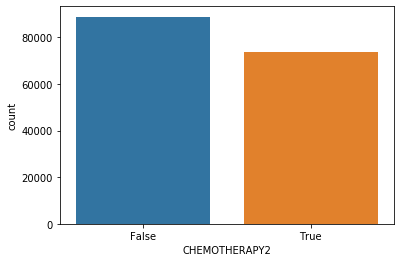

In [89]:
ax = sns.countplot(data = df, x = 'CHEMOTHERAPY2')
plt.gcf().set_size_inches(6,4)

In [90]:
df['TARGETED2'].value_counts()

False    128781
True      33755
Name: TARGETED2, dtype: int64

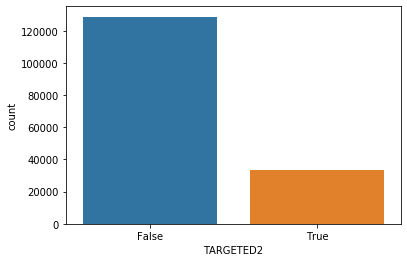

In [91]:
ax = sns.countplot(data = df, x = 'TARGETED2')
plt.gcf().set_size_inches(6,4)

In [92]:
df['CHEM_TARG2'].value_counts()

False    146687
True      15849
Name: CHEM_TARG2, dtype: int64

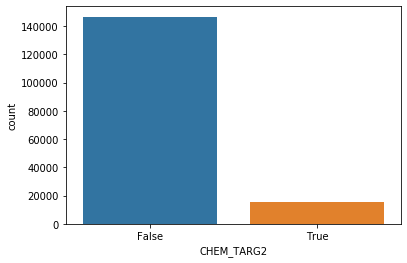

In [93]:
ax = sns.countplot(data = df, x = 'CHEM_TARG2')
plt.gcf().set_size_inches(6,4)

In [94]:
df['CHEM_RADIO2'].value_counts()

False    162124
True        412
Name: CHEM_RADIO2, dtype: int64

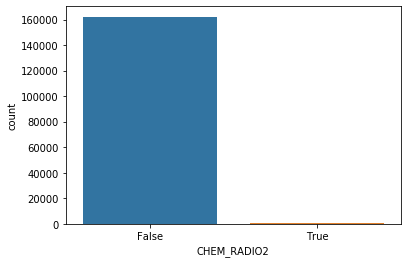

In [95]:
ax = sns.countplot(data = df, x = 'CHEM_RADIO2')
plt.gcf().set_size_inches(6,4)

In [96]:
df['TARG_RADIO2'].value_counts()

False    162481
True         55
Name: TARG_RADIO2, dtype: int64

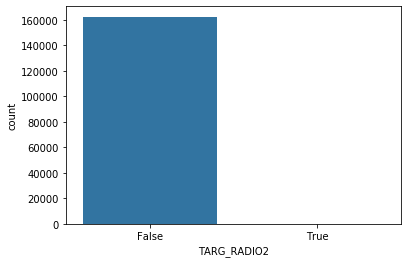

In [97]:
ax = sns.countplot(data = df, x = 'TARG_RADIO2')
plt.gcf().set_size_inches(6,4)

In [98]:
df['CHEM_RADIO_TARG2'].value_counts()

False    162528
True          8
Name: CHEM_RADIO_TARG2, dtype: int64

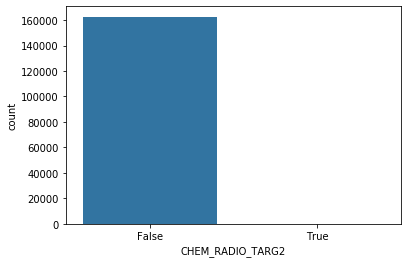

In [99]:
ax = sns.countplot(data = df, x = 'CHEM_RADIO_TARG2')
plt.gcf().set_size_inches(6,4)

In [100]:
df['HORM_TARG2'].value_counts()

False    162212
True        324
Name: HORM_TARG2, dtype: int64

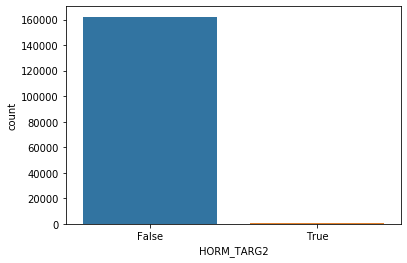

In [101]:
ax = sns.countplot(data = df, x = 'HORM_TARG2')
plt.gcf().set_size_inches(6,4)

In [102]:
df['HORMONE2'].value_counts()

False    152836
True       9700
Name: HORMONE2, dtype: int64

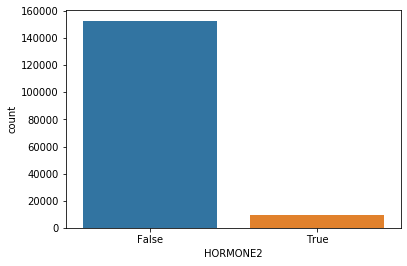

In [103]:
ax = sns.countplot(data = df, x = 'HORMONE2')
plt.gcf().set_size_inches(6,4)

In [104]:
df['OTHER2'].value_counts()

False    158350
True       4186
Name: OTHER2, dtype: int64

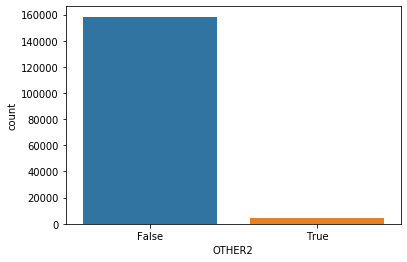

In [105]:
ax = sns.countplot(data = df, x = 'OTHER2')
plt.gcf().set_size_inches(6,4)

In [106]:
df = df.drop(['CHEMOTHERAPY', 'TARGETED', 'CHEM_TARG', 'CHEM_RADIO',
       'TARG_RADIO', 'CHEM_RADIO_TARG', 'HORM_TARG', 
       'HORMONE', 'OTHER'], axis = 1)
df.head()

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,MERGED_PATIENT_ID_x,LINK_NUMBER,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID_y,BENCHMARK_GROUP,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
0,10000724,M,810000724,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10000752,F,810000752,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001050,F,810001050,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001750,M,810001750,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10001824,F,810001824,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [107]:
df[['PATIENTID', 'BENCHMARK_GROUP','CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2',
       'TARG_RADIO2', 'CHEM_RADIO_TARG2', 'HORM_TARG2', 
       'HORMONE2', 'OTHER2']].dropna().head(10)

,PATIENTID,BENCHMARK_GROUP,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
13,10004961,OXALIPLATIN + MDG,True,False,False,False,False,False,False,False,False
14,10004961,GEMCITABINE,True,False,False,False,False,False,False,False,False
23,10008710,LENALIDOMIDE,False,True,False,False,False,False,False,False,False
26,10010894,CISPLATIN + RT,True,False,False,True,False,False,False,False,False
27,10010894,ECX,True,False,False,True,False,False,False,False,False
30,10011603,VEMURAFENIB,False,True,False,True,False,False,False,False,False
31,10011603,CISPLATIN + RT,False,True,False,True,False,False,False,False,False
38,10016203,FLUOROURACIL,True,False,False,False,False,False,False,False,False
42,10019777,RITUXIMAB,False,True,False,False,False,False,False,False,False
43,10019777,RITUXIMAB,False,True,False,False,False,False,False,False,False


In [108]:
df.isna().sum()

PATIENTID                          0
SEX                                0
LINKNUMBER                         0
ETHNICITY                      10695
NEWVITALSTATUS                     0
NUMBER_TUMOURS                     0
SC500                              0
SC501                              0
SC502                              0
SC503                              0
SC504                              0
SC505                              0
SC506                              0
SC508                              0
BEH_BENIGN                         0
BEH_MALIG                          0
BEH_MICINV                         0
BEH_INSITU                         0
BEH_UNCERT                         0
T0                                 0
T1                                 0
T2                                 0
T3                                 0
T4                                 0
N0                                 0
N1                                 0
N2                                 0
N

In [109]:
df.columns.tolist()

['PATIENTID',
 'SEX',
 'LINKNUMBER',
 'ETHNICITY',
 'NEWVITALSTATUS',
 'NUMBER_TUMOURS',
 'SC500',
 'SC501',
 'SC502',
 'SC503',
 'SC504',
 'SC505',
 'SC506',
 'SC508',
 'BEH_BENIGN',
 'BEH_MALIG',
 'BEH_MICINV',
 'BEH_INSITU',
 'BEH_UNCERT',
 'T0',
 'T1',
 'T2',
 'T3',
 'T4',
 'N0',
 'N1',
 'N2',
 'N3',
 'M1',
 'STAGE0',
 'STAGE1',
 'STAGE2',
 'STAGE3',
 'STAGE4',
 'GRADE1',
 'GRADE2',
 'GRADE3',
 'GRADE4',
 'AGE_MEAN',
 'L0801',
 'L1001',
 'L1701',
 'L0201',
 'L0401',
 'L1201',
 'L0301',
 'L0901',
 'ER_POS',
 'PR_POS',
 'HER_POS',
 'CURATIVE',
 'NONCURATIVE',
 'NOACTTREAT',
 'ECOG0',
 'ECOG1',
 'ECOG2',
 'ECOG3',
 'ECOG4',
 'ACE0',
 'ACE1',
 'ACE2',
 'ACE3',
 'LEFT',
 'RIGHT',
 'MIDLINE',
 'BILATERAL',
 'DEPR1',
 'DEPR2',
 'DEPR3',
 'DEPR4',
 'DEPR5',
 'CANCER_DAYS_MEAN',
 'CANCER_MONTHS_MEAN',
 'CANCER_YEARS_MEAN',
 'MERGED_PATIENT_ID_x',
 'LINK_NUMBER',
 'MERGED_TUMOUR_ID',
 'MERGED_REGIMEN_ID',
 'HEIGHT_AT_START_OF_REGIMEN',
 'WEIGHT_AT_START_OF_REGIMEN',
 'INTENT_OF_TREATMENT',
 

In [110]:
columns_selected = ['PATIENTID', 'SEX', 'ETHNICITY', 'NEWVITALSTATUS',
       'NUMBER_TUMOURS', 'SC500', 'SC501', 'SC502', 'SC503', 'SC504', 'SC505', 'SC506', 
       'SC508', 'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU','BEH_UNCERT', 
       'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1',
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 'ER_POS',
       'PR_POS', 'HER_POS', 'CURATIVE', 'NONCURATIVE', 'NOACTTREAT', 
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3','ECOG4', 
       'ACE0', 'ACE1', 'ACE2', 'ACE3', 'LEFT', 'RIGHT', 'MIDLINE', 'BILATERAL', 
       'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',
       'CANCER_DAYS_MEAN', 'CANCER_MONTHS_MEAN', 'CANCER_YEARS_MEAN', 'BMI3',
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT', 'DISEASE_MOD', 'STAGING', 
       'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2',
       'CHEM_RADIO2', 'TARG_RADIO2', 'CHEM_RADIO_TARG2', 'HORM_TARG2', 'HORMONE2', 'OTHER2']

In [111]:
df = df[columns_selected]
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
0,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [112]:
df.shape

(162536, 92)

In [113]:
df = df.drop_duplicates()
df.shape

(105686, 92)

In [114]:
df[df.groupby('PATIENTID')['PATIENTID'].transform('size') > 1].sort_values(by = 'PATIENTID').head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2


In [115]:
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE,NONCURATIVE,NOACTTREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI3,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
0,10000724,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,71.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,1226.0,40.280088,3.356674,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001750,M,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,71.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,846.0,27.795232,2.316269,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.325078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [116]:
df.to_csv('./Data/avpat_avtum_sactpat_sacttum_sactreg.csv', sep = '^')